# Image Interpretation – Assignment 2

This assignment on Features covers the labs from the 26th of September. The exercises on this sheet are graded by a maximum of 10 points. You will be asked to implement several functions and write a brief report.

In order to submit the results, send this ipynb file which should contain implemented functions and brief reports with all findings to <mikhail.usvyatsov@geod.baug.ethz.ch> with subject
[Image Interpretation 2019 Assignment 2]
no later than on the
02th of October, 2019.

Your functions should work when called by the provided test code (functions prefixed with `test` ) which must not be modified. When run, they should produce a plausible output, no warnings, and no unnecessary output. Eventual example output is given in the ref_-images. The functions that you write take images as arguments, not image filenames (i.e. do not use imread inside the functions). Your functions should not generate figures/plots themselves, the plots are generated by the test functions.

In addition to the functions, include a brief report explaining the structure of the code and the Python functions used. This includes the reasons for choosing particular functions as well as a short justification of their parameter setting. For the more complicated tasks, the choice of the underlying data structures and algorithms should be explained too. We encourage you to add also diagrams, illustrations, and figures into the report when appropriate, but it is not necessary to copy the related theory from the lecture slides. The code should contain comments if appropriate.

Team work is not allowed. Everybody implements his/her own code and writes his/her own report. Discussing issues with others is fine, sharing code and/or report with others is not. If you use any code fragments found on the Internet, make sure you reference them properly.

# Problem 1 2P.

Gaussian smoothing is often needed when extracting multi-scale features. 
* Implement function `ii_gaussian` that takes two arguments: an image $I$ and the size of the Gaussian kernel $s$ (which is guaranteed to be odd). The function returns the smoothed image of the same size as the input image.
* Explain what should the standard deviation of the Gaussian to fit nicely in the kernel of size s and why.

You can test your function with the help of `test_gaussian`, which produces 4 images, 3 of which are smoothed with Gaussian filters of different sizes.

Helpful Python functions: `sp.signal.convolve2d`

In [1]:
import cv2
import numpy as np
import scipy as sp
import scipy.ndimage
import scipy.signal
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def ii_gaussian(img, size):
    # IMPLEMENT ME: here
    tmp = img.copy()
    
    # construct the 2D Gaussian filter kernel
    sigma = (size-1)/6 # calcualte sigma
    gaussian_kernel = np.outer(sp.signal.gaussian(M=size, std=sigma), sp.signal.gaussian(M=size, std=sigma))
    
    # 2D convolution using Gaussian filter
    tmp = sp.signal.convolve2d(tmp, gaussian_kernel, boundary='symm', mode='same')
    
    return tmp

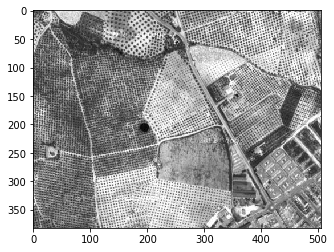

In [3]:
from skimage import color

plt.imshow(color.rgb2gray(plt.imread('./data/orchard.png')), cmap=plt.cm.gray)

In [4]:
def test_gaussian():
    image = cv2.cvtColor(plt.imread('./data/orchard.png'), cv2.COLOR_RGB2GRAY)
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

    axes[0, 0].imshow(image)
    axes[0, 0].set_title('Original')
    axes[0, 1].imshow(ii_gaussian(image, 5))
    axes[0, 1].set_title('Gaussian-Filtered size=5')
    axes[1, 0].imshow(ii_gaussian(image, 9))
    axes[1, 0].set_title('Gaussian-Filtered size=9')
    axes[1, 1].imshow(ii_gaussian(image, 15))
    axes[1, 1].set_title('Gaussian-Filtered size=15')
    assert np.allclose(image.shape, ii_gaussian(image, 15).shape)

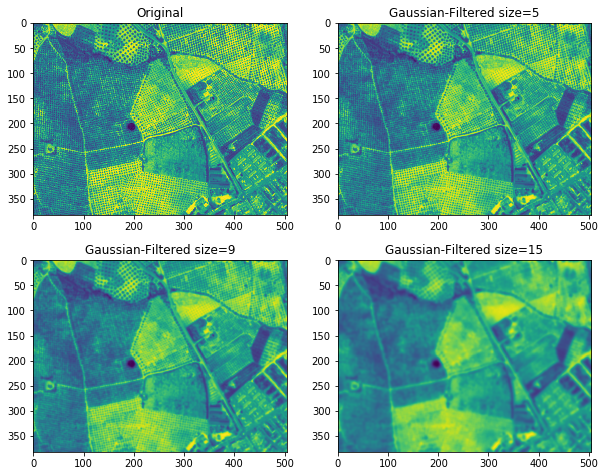

In [5]:
test_gaussian()

## Report - Part 1 - Gaussian smoothing
**Explain what should the standard deviation of the Gaussian to fit nicely in the kernel of size s and why.**

The Gaussian filter is a kind of low-pass filter that would reduce image noise and detailed information by blurring the images. Actually, it is a 'weighted filter' to suppress high frequencies, with more weights towards the center. For the Gaussian distribution, three times of standard deviations from the mean value will cover 99% information. Thus, we can neglect the information outside three times of sigma from the center pixel. Considering the center as well, sigma can be calculated as: `sigma = (size-1)/6`.

As shown from the above results, with increasing kernel size, the images would be more blur and blur.

# Problem 2. 4P.
Edges inside images contains most of the information of the scenes being captured, that’s why they are one of the most used features when interpreting images.
* Implement function `ii_deriv` that compute the derivative of an image. It that takes 3 arguments: a (grayscale) image $I$, and the orders of derivatives in $x$ and $y$ directions. The returned derivative image has the same size as the input image. The first-order horizontal derivative filter should be a `[-1 0 1]` filter. Similarly, the first order vertical derivative filter corresponds to its transposed version.
* Implement function `ii_sobel` that computes a better derivative operator on an image by first computing the derivative and then applying the gaussian filter of the specified dimention. It that takes 4 arguments: a (grayscale) image $I$, the order of derivative in x and y directions and the amount of gaussian blur. The returned edge image has the same size as the input image.

You can test your function with the help of `test_deriv1`, `test_deriv2`, and `test_sobel` which each produce images using different parameter values. If you wonder how to create the filters, recall that convolution is a commutative and associative operation.

**Check and explain if it is better to apply the gaussian filter on the derivative function to extract edges of an image?**

In [6]:
def ii_deriv(img, order_x, order_y):
    # IMPLEMENT ME: here
    tmp = img.copy()
    
    # construct the first-order derivative filter in horizontal and vertical direction
    x_deriv = np.array([-1,0,1]).reshape(1,3)
    y_deriv = np.transpose(x_deriv)
    
    # 2D convolution using the derivative filter
    for i in range(order_x):
        tmp = sp.signal.convolve2d(tmp, x_deriv, boundary='symm', mode='same')
    for i in range(order_y):
        tmp = sp.signal.convolve2d(tmp, y_deriv, boundary='symm', mode='same')
        
    return tmp
    
def ii_sobel(img, order_x, order_y, blur):
    # IMPLEMENT ME: here
    tmp = img.copy()
    
    # compute the derivative filter
    tmp = ii_deriv(img, order_x, order_y)
    
    # apply the Gaussian filter
    tmp = ii_gaussian(tmp, blur)
    
    return tmp

In [7]:
def test_sobel():
    image = cv2.cvtColor(plt.imread('./data/pepper.png'), cv2.COLOR_RGB2GRAY)
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
    
    d = ii_deriv(image, 1, 0)
    axes[0, 0].imshow((d - d.min()) / (d.max() - d.min()))
    axes[0, 0].set_title('1st x-derivative')
    d = ii_sobel(image,  1, 0, 7)
    axes[0, 1].imshow((d - d.min()) / (d.max() - d.min()))
    axes[0, 1].set_title('1st x-derivative gauss')
    
    d_x = ii_deriv(image, 1, 0)
    d_y = ii_deriv(image, 0, 1)
    d = np.sqrt(d_x**2 + d_y**2)
    
    axes[1, 0].imshow((d - d.min()) / (d.max() - d.min()))
    axes[1, 0].set_title('deriv edge strength')
    
    d_x = ii_sobel(image, 1, 0, 7)
    d_y = ii_sobel(image, 0, 1, 7)
    d = np.sqrt(d_x**2 + d_y**2)
    
    axes[1, 1].imshow((d - d.min()) / (d.max() - d.min()))
    axes[1, 1].set_title('gauss edge strength')

In [8]:
def test_deriv1():
    image = cv2.cvtColor(plt.imread('./data/zebra.png'), cv2.COLOR_RGB2GRAY)
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
    
    axes[0, 0].imshow(image)
    axes[0, 0].set_title('Original')
    
    d = ii_deriv(image, 1, 0)
    axes[0, 1].imshow((d - d.min()) / (d.max() - d.min()))
    axes[0, 1].set_title('1st order x-derivative')
    
    d = ii_deriv(image, 2, 0)
    axes[1, 0].imshow((d - d.min()) / (d.max() - d.min()))
    axes[1, 0].set_title('2nd order x-derivative')
    
    d = ii_deriv(image, 0, 1)
    
    axes[1, 1].imshow((d - d.min()) / (d.max() - d.min()))
    axes[1, 1].set_title('1st order y-derivative')
    
    assert np.allclose(image.shape, ii_deriv(image, 0, 1).shape)

In [9]:
def test_deriv2():
    image = cv2.cvtColor(plt.imread('./data/zebra.png'), cv2.COLOR_RGB2GRAY)
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
    
    d = ii_deriv(image, 0, 2)
    axes[0, 0].imshow((d - d.min()) / (d.max() - d.min()))
    axes[0, 0].set_title('2nd order y-derivative')
    d = ii_deriv(image, 1, 1)
    axes[0, 1].imshow((d - d.min()) / (d.max() - d.min()))
    axes[0, 1].set_title('1st order xy-derivative')

    d_x = ii_deriv(image, 1, 0)
    d_y = ii_deriv(image, 0, 1)
    d = np.sqrt(d_x**2 + d_y**2)
    
    axes[1, 0].imshow((d - d.min()) / (d.max() - d.min()))
    axes[1, 0].set_title('deriv edge strength')
    
    h_size = 15
    d_xx = ii_deriv(image, 2, 0)
    d_yy = ii_deriv(image, 0, 2)
    d_xy = ii_deriv(image, 1, 1)
    d = d_xx * d_yy - d_xy**2

    axes[1, 1].imshow((d - d.min()) / (d.max() - d.min()))
    axes[1, 1].set_title('determinant of hessian')

#     d_x = ii_sobel(image, 1, 0, 7)
#     d_y = ii_sobel(image, 0, 1, 7)
#     d = np.sqrt(d_x**2 + d_y**2)
    
#     axes[1, 1].imshow((d - d.min()) / (d.max() - d.min()))
#     axes[1, 1].set_title('gauss edge strength')

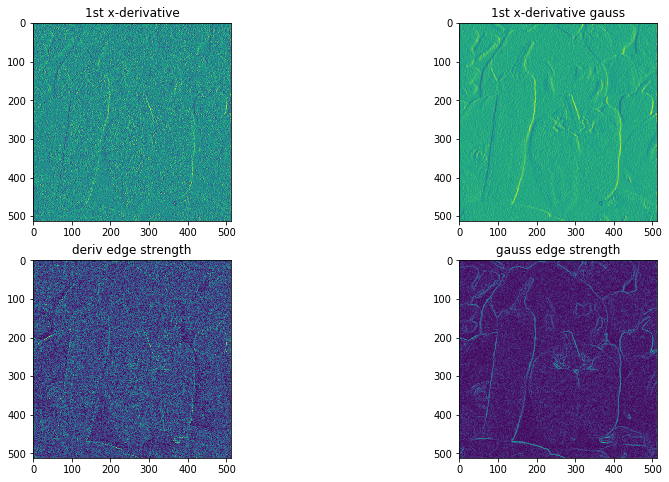

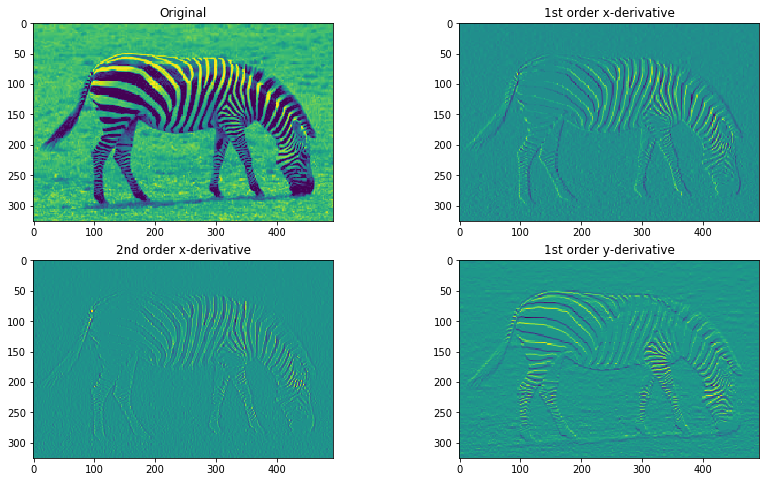

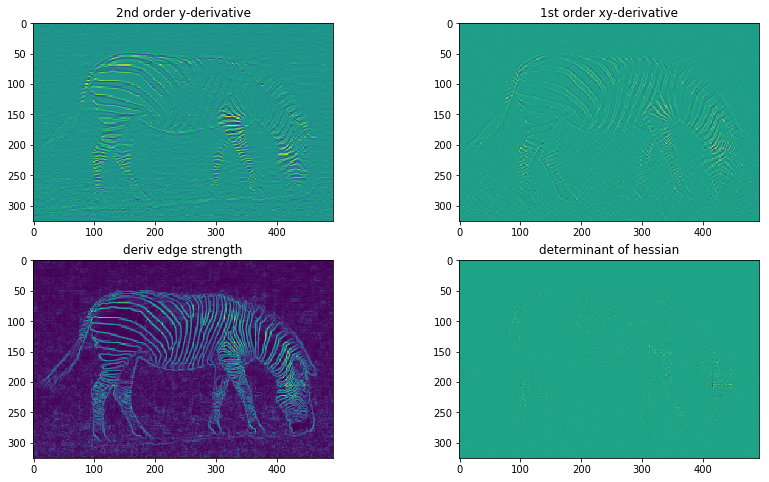

In [10]:
test_sobel()
test_deriv1()
test_deriv2()

## Report - Part 2 - Edge detection
**Check and explain if it is better to apply the Gaussian filter on the derivative function to extract edges of an image?**

Edges are the places where the image brightness changes sharply, i.e., has discontinuities. Edges could be detected by the local maxima or minima of the first derivative, or the zero-crossings of the second derivative. While differential masks act as high-pass filters which tend to amplify noise. The Gaussian filter can help reduce the noise after derivative filters. And there will be always a tradeoff between noise suppression and edge localization, i.e., the Gaussian filter with larger sigma reduces more noise, but worsens localization and vice-versa.

It is obviously observed from the example of the eggplant, that by adding the Gaussian filter after the derivative filters, both the first order x-derivative and the strengthed derivative filtering work much better than those without Gaussian filter. It helps a lot by removing the background noise. 

Besides, as shown from the zebra example, the x- and y-derivative filters can help to detect the edges respectively along the x- and y-direction.

# Problem 3. 2P.
Variance in pixel neighborhood is a feature useful for urban area detection. Implement function `ii_variance` that takes two arguments: a (grayscale) image $I$ and the (odd) size of the window $s$. The returned image has the same size as the input image: For each pixel, the variance in an $s \times s$ neighborhood should be computed. You can use `test_variance` to show an image and the result after filtering. Can you see the urban area? Take special care here not to introduce boundary artifacts: No high variance should be detected at image boundary.

Helpful Python functions: `np.pad`, `scipy.ndimage.generic_filter`

**Can you see the urban area? Why? Is it better to compute the variance on the grayscale image or the color channels separately? 
Show the variance of different channels and motivate your answer.**

In [11]:
def ii_variance(img, size):
    # IMPLEMENT ME: here
    tmp = img.copy()

    # variance filtering
    tmp = scipy.ndimage.generic_filter(tmp, np.var, footprint=np.ones((size,size)), mode='nearest')
    
    return tmp

In [12]:
def test_variance():
    image = cv2.cvtColor(plt.imread('./data/sat.png'), cv2.COLOR_RGB2GRAY)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
    
    axes[0].imshow(image)
    axes[0].set_title('Original')
    
    d = ii_variance(image, 15)
    axes[1].imshow((d - d.min()) / (d.max() - d.min()))
    axes[1].set_title('Variance-Filtered size=15')
    
    assert np.allclose(image.shape, ii_variance(image, 15).shape)

In [13]:
def test_variance4channel():
    image = plt.imread('./data/sat.png')
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

    axes[0,0].imshow(image)
    axes[1,1].set_title('Original RGB image')
    
    dR = ii_variance(image[:,:,2], 15)
    axes[0,1].imshow((dR - dR.min()) / (dR.max() - dR.min()), cmap = 'gray')
    axes[0,1].set_title('Variance-Filtered for Red Channel size=15')

    dG = ii_variance(image[:,:,1], 15)
    axes[1,0].imshow((dG - dG.min()) / (dG.max() - dG.min()), cmap = 'gray')
    axes[1,0].set_title('Variance-Filtered for Green Channel size=15')

    dB = ii_variance(image[:,:,0], 15)
    axes[1,1].imshow((dB - dB.min()) / (dB.max() - dB.min()), cmap = 'gray')
    axes[1,1].set_title('Variance-Filtered for Blue Channel size=15')

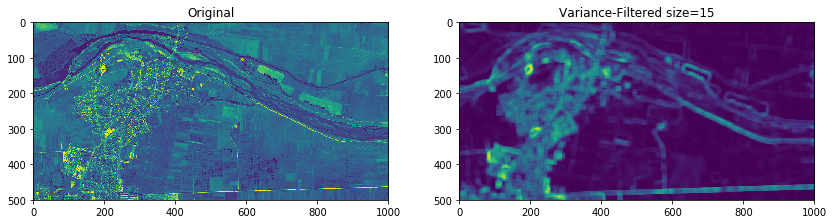

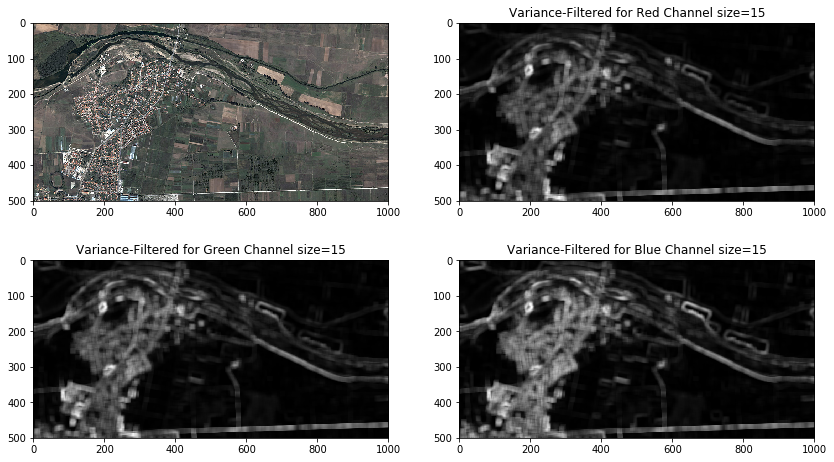

In [14]:
test_variance()
test_variance4channel()

## Report - Part 3 - Variance
**Can you see the urban area? Why? Is it better to compute the variance on the grayscale image or the color channels separately? Show the variance of different channels and motivate your answer.**

The boundary artifacts happen at the image boundary due to the lack of the surrounding pixels around the center for the convolution kernel. As a result, `np_pad` could be used to pad the edges of the image to fit the size of the kernel at the boundary. This could be also achieved by setting the 'mode' parameter of the `scipy.ndimage.generic_filter`.

The urban areas can be clearly recognized as non-black areas after variance filtering. The reason is that much more differences in brightness occur in urban areas than in rural ones. In urban areas, the brightness values differ a lot in relatively small regions due to various dissimilar and closely distributed types of land covers like buildings, roads, and trees. In contrast, one same type often spreads over much larger regions in rural areas like crops, grasses, and forests. This will cause very small variances for the rural areas unless the boundary of two different land covers.

Transformations from RGB color to grayscale using: `0.299*G + 0.587*G + 0.114*G`. According to the results above, there are no big differences between grayscale images and separate color channels because the urban areas will differ in each color channel. So the task to detect urban areas by variance filtering can be either implemented by the grayscale image or the separating color channels.

# Problem 4. 2P.
Histograms can be used either as texture features or as robustifiers of more complicated (gradient-based) features. Implement function `ii_hist` that takes two arguments: a (grayscale) image $I$ and the number of levels $n$. The function then returns image histogram with $n$ bins that are evenly spaced over the whole theoretical value range (use e.g. `im2double` to get a standardized range of `[0 1]`). Test
your function on input (0:1/255:1,4). Did it correctly output `[64 64 64 64]`? You can use `test_hist` to perform additional testing.

Helpful Python functions: `np.linalg.linspace`, `np.digitize` (do not use `np.histogram*`, `plt.hist`)

In [15]:
def ii_hist(image, N):
    # IMPLEMENT ME: here
    hist = np.zeros(N)
       
    # implement im2double likewise function in MatLab
    img_min = np.min(image)
    img_max = np.max(image)
    image = (image - img_min) / (img_max - img_min)
    
    # return evenly distributed space with N levels
    bins = np.linspace(0, 1, num=N+1) 
    
    # return the indices of bins 
    inds = np.digitize(image, bins, right=False)
    
    # cound the number of indices at different given levels
    for i in range(N):
        hist[i] = np.sum(inds == i+1)
        
    return hist

In [16]:
def test_hist():
    image = plt.imread('./data/zebra.png')
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
    
    patch_1 = image[59:158, 119:218]
    patch_2 = image[184:283, 193:293]
    
    axes[0, 0].imshow(patch_1)
    axes[0, 0].set_title('Patch 1')
   
    hist_1 = ii_hist(patch_1, 16)
    axes[0, 1].bar(np.arange(len(hist_1)), hist_1)
    axes[0, 1].set_title('Histogram patch 1')
    
    axes[1, 0].imshow(patch_2)
    axes[1, 0].set_title('Patch 2')
   
    hist_2 = ii_hist(patch_2, 16)
    axes[1, 1].bar(np.arange(len(hist_2)), hist_2)
    axes[1, 1].set_title('Histogram patch 2')
    
    assert hist_1.shape[0] == 16

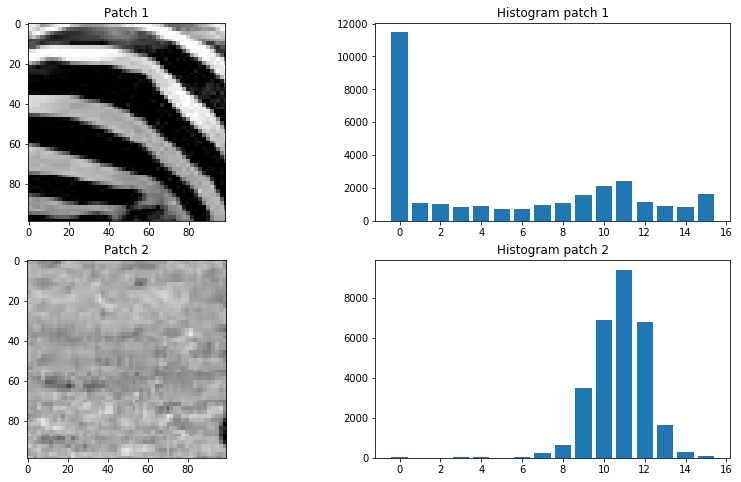

In [17]:
test_hist()
# narray = np.linspace(0,1,256+1)
# ii_hist(narray,4)

## Report - Part 4: Histogram
To implement histograms, firstly we need to normalize data to the range of `[0,1]` using maximum and minimum value. Then, evenly distributed space with a specified number of levels should be generated. Pay attention to the setting of the parameter 'num' of the `np.linspace`. It means the number of samples to generate. As a result, for `N` levels/intervals, we need to generate `N+1` samples in total. Finally, `np.digitize` can return the indices of the bins/intervals to which each input value belongs and `np.sum` is further applied to summarize the total number for each pin.